In [1]:
library(readxl)
DS_Assignment_Part_1_data_set <- read_excel("./DS - Assignment Part 1 data set.xlsx")
df <- DS_Assignment_Part_1_data_set
rm(DS_Assignment_Part_1_data_set)

df$`Number of convenience stores` <- as.factor(df$`Number of convenience stores`) 
df$`Number of bedrooms` <- as.factor(df$`Number of bedrooms`)

library(tidyverse)

str_extract_all(df$`Transaction date`, '\\.\\d+',simplify = TRUE) |>
                                        str_replace_all("^$","0") |>
                                        as.numeric()              |>
                                        magrittr::multiply_by(12) |>
                                        magrittr::add(1)          |>
                                        round()                   -> 
                                        Transaction_Month

df$Transaction_Month <- Transaction_Month



df$`Transaction date`     |>
str_remove_all('\\.\\d+') |>
as.numeric()              -> df$`Transaction date`



── Attaching packages ─────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
set.seed(412)
train.index <- caret::createDataPartition(df$`Number of convenience stores`, p = .7, list = FALSE)
train <- df[ train.index,]
test  <- df[-train.index,]

In [3]:
library(e1071)
library(caret)

train<-apply(train, 2, as.numeric) |> as.data.frame()
test <-apply(test, 2, as.numeric) |> as.data.frame()
tune <- tune.svm(x=train[,-9],y=train$`House price of unit area`,cost = 
                 c(.01, .1, .5, 1, 2.5)
                 , gamma = c(0.1,.5, 1,5), kernel=c("radial") )

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [4]:
tune


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 55.56497 


In [5]:
regressor = svm(formula = `House price of unit area` ~  .,
                 data = train,
                 gamma=0.1,
                 cost=1,
                 type = 'nu-regression',
                 kernel = 'radial')



In [6]:
percent_error <- function(resid,actual,title)
    {
    
    percent <- resid/actual*100
    
    percent |> Filter(\(x) x> -100 & x < 100, x=_) |> hist(xlab = "Percent deviation", main = title)
    
    percent |> abs() |> mean() -> error 
    
    library(glue)
    mtext(glue("The mean absolute {title} in percentage is { round(error,digits=3) }"), side =3)
    
    return (error)
    
    
    }

[1] 17.11758

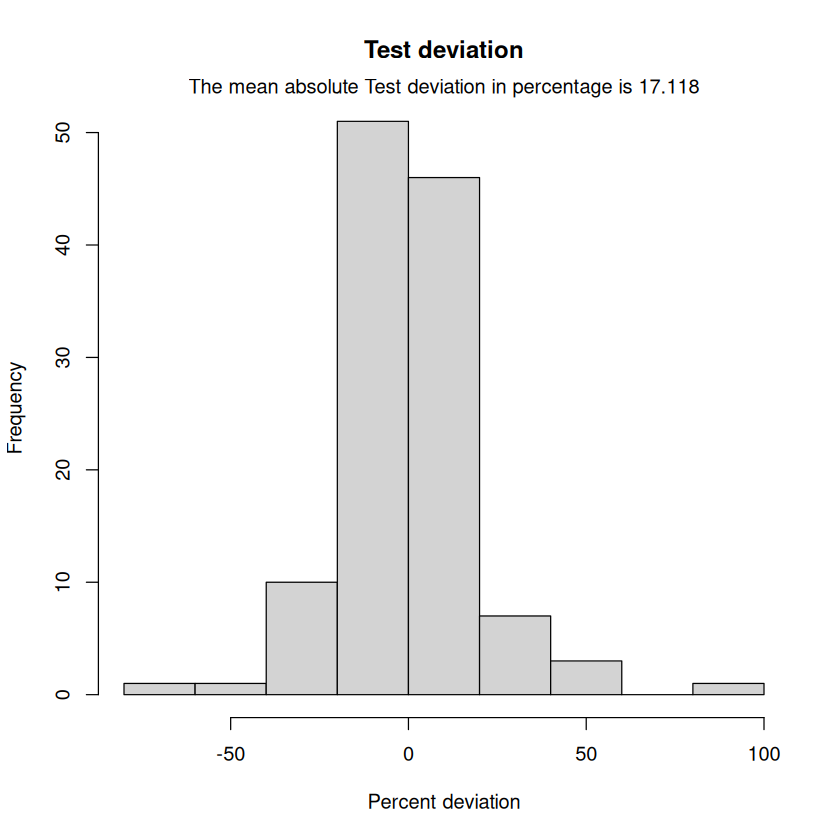

In [8]:
y_pred = predict(regressor, newdata = test[,-c(9)])
percent_error(y_pred - test$`House price of unit area`,test$`House price of unit area`,"Test deviation" )